<a href="https://colab.research.google.com/github/demo0302/actionRecognition/blob/main/actionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy opencv-python matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


In [4]:
# Function to preprocess video frames
def preprocess_frames(video_path, max_frames=20, frame_size=(112, 112)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0
    while cap.isOpened() and count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frame = frame / 255.0  # Normalize frame
        frames.append(frame)
        count += 1
    cap.release()
    return np.array(frames)

In [5]:
# Function to load UCF50 dataset
def load_ucf50_dataset(dataset_path, action_categories, max_videos_per_category=5):
    data = []
    labels = []
    for idx, category in enumerate(action_categories):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            videos = os.listdir(category_path)[:max_videos_per_category]
            for video in videos:
                video_path = os.path.join(category_path, video)
                frames = preprocess_frames(video_path)
                if len(frames) == 0:
                    continue
                data.append(frames)
                labels.append(idx)
    return np.array(data), to_categorical(labels, num_classes=len(action_categories))

In [6]:
# Function to load UCF101 dataset
def load_ucf101_dataset(dataset_path, action_categories, max_videos_per_category=5):
    data = []
    labels = []
    for idx, category in enumerate(action_categories):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            videos = os.listdir(category_path)[:max_videos_per_category]
            for video in videos:
                video_path = os.path.join(category_path, video)
                frames = preprocess_frames(video_path)
                print(f'Loaded video: {video_path}, frames: {len(frames)}')
                if len(frames) == 0:
                    continue
                data.append(frames)
                labels.append(idx)
    return np.array(data), to_categorical(labels, num_classes=len(action_categories))

In [7]:
# Function to visualize random videos from each action category
def visualize_data(dataset_path, action_categories, num_categories=5):
    categories_to_visualize = random.sample(action_categories, min(num_categories, len(action_categories)))
    for category in categories_to_visualize:
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            videos = os.listdir(category_path)
            if videos:
                video = random.choice(videos)
                video_path = os.path.join(category_path, video)
                cap = cv2.VideoCapture(video_path)
                ret, frame = cap.read()
                cap.release()
                if ret:
                    plt.figure()
                    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                    plt.title(f'Category: {category}')
                    plt.axis('off')
                    plt.show()

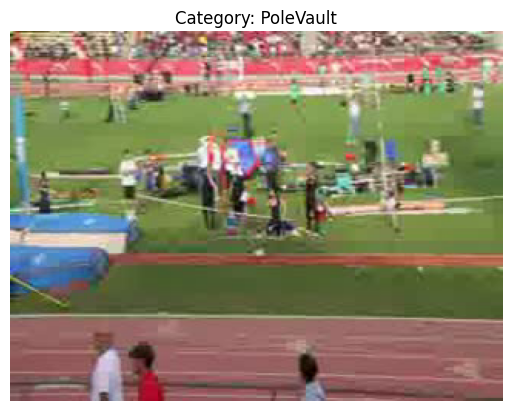

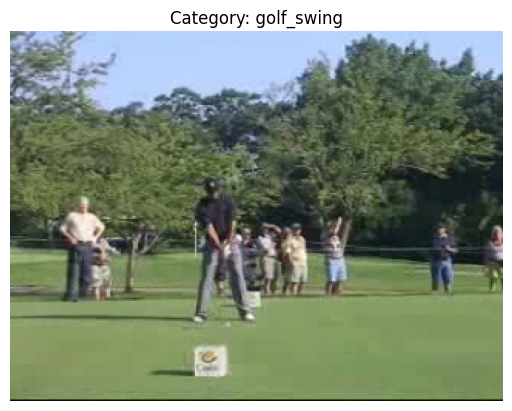

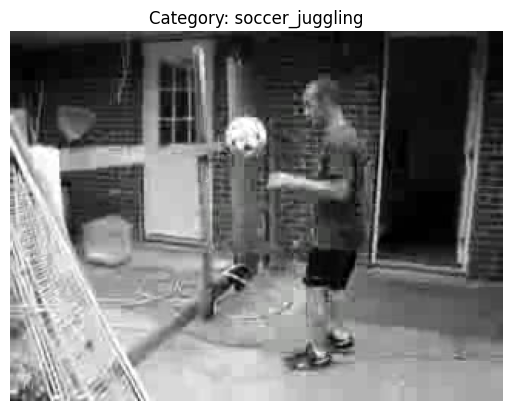

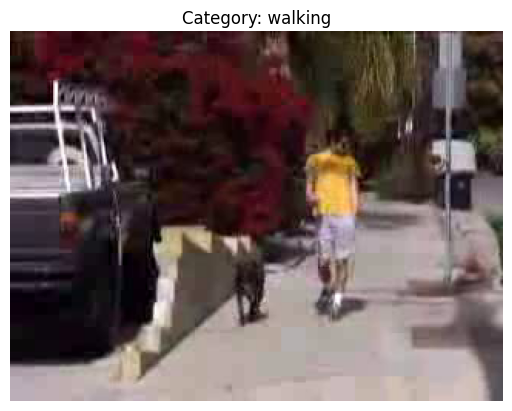

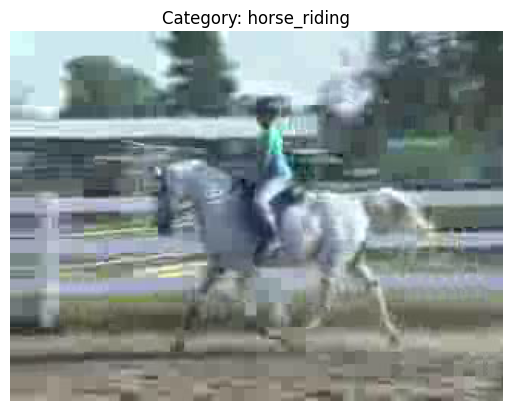

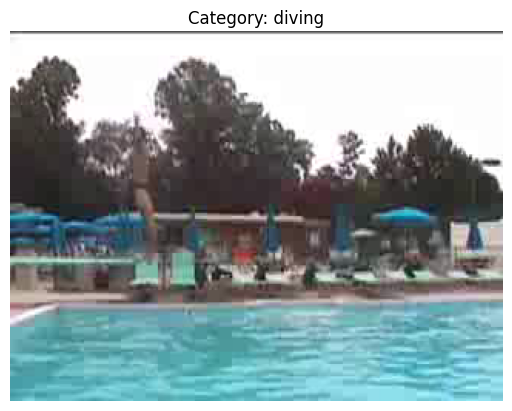

Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/walking/v_walk_dog_21_01.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/walking/v_walk_dog_21_02.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/walking/v_walk_dog_21_03.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/walking/v_walk_dog_21_04.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/walking/v_walk_dog_25_01.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/soccer_juggling/v_juggle_13_01.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/soccer_juggling/v_juggle_13_03.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/soccer_juggling/v_juggle_13_02.avi, frames: 20
Loaded video: /content/drive/MyDrive/Colab Notebooks/a

In [8]:

# Path to the datasets
dataset_path_ucf50 = '/content/drive/MyDrive/Colab Notebooks/UCF50 (1)/UCF50'
dataset_path_ucf101 = '/content/drive/MyDrive/Colab Notebooks/action_youtube_naudio'


# List action categories for both datasets
action_categories_ucf50 = os.listdir(dataset_path_ucf50)
action_categories_ucf101 = os.listdir(dataset_path_ucf101)


# Visualize data from UCF50
visualize_data(dataset_path_ucf50, action_categories_ucf50)


# Preprocess the UCF50 Dataset
data_ucf50, labels_ucf50 = load_ucf50_dataset(dataset_path_ucf50, action_categories_ucf50)


# Split the UCF50 Data into Train and Test Set
X_train_ucf50, X_test_ucf50, y_train_ucf50, y_test_ucf50 = train_test_split(data_ucf50, labels_ucf50, test_size=0.2, random_state=42)


# Visualize data from UCF101
visualize_data(dataset_path_ucf101, action_categories_ucf101)


# Preprocess the UCF101 Dataset
data_ucf101, labels_ucf101 = load_ucf101_dataset(dataset_path_ucf101, action_categories_ucf101)


# Split the UCF101 Data into Train and Test Set
X_train_ucf101, X_test_ucf101, y_train_ucf101, y_test_ucf101 = train_test_split(data_ucf101, labels_ucf101, test_size=0.2, random_state=42)

In [9]:
# Construct the CNN Model
base_model_ucf50 = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(112, 112, 3))
x = base_model_ucf50.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_ucf50 = tf.keras.layers.Dense(len(action_categories_ucf50), activation='softmax')(x)
cnn_model_ucf50 = tf.keras.Model(inputs=base_model_ucf50.input, outputs=output_ucf50)


# Compile & Train the CNN Model for UCF50
cnn_model_ucf50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
X_train_reshaped_ucf50 = X_train_ucf50.reshape(-1, 112, 112, 3)
X_test_reshaped_ucf50 = X_test_ucf50.reshape(-1, 112, 112, 3)
y_train_reshaped_ucf50 = np.repeat(y_train_ucf50, 20, axis=0)
y_test_reshaped_ucf50 = np.repeat(y_test_ucf50, 20, axis=0)
history_cnn_ucf50 = cnn_model_ucf50.fit(X_train_reshaped_ucf50, y_train_reshaped_ucf50, epochs=10, batch_size=2, validation_split=0.2)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
800/800 [==============================] - 156s 166ms/step - loss: 1.9340 - accuracy: 0.4856 - val_loss: 13.7337 - val_accuracy: 0.0500
Epoch 2/10
800/800 [==============================] - 120s 150ms/step - loss: 0.5871 - accuracy: 0.8319 - val_loss: 13.3750 - val_accuracy: 0.0150
Epoch 3/10
800/800 [==============================] - 117s 146ms/step - loss: 0.3117 - accuracy: 0.9081 - val_loss: 16.3293 - val_accuracy: 0.0925
Epoch 4/10
800/800 [==============================] - 112s 140ms/step - loss: 0.2382 - accuracy: 0.9344 - val_loss: 13.0001 - val_accuracy: 0.0500
Epoch 5/10
800/800 [==============================] - 111s 139ms/step - loss: 0.1061 - accuracy: 0.9656 - val_loss: 6.6053 - val_accuracy: 0.3200
Epoch 6/10
800/800 [==============================] - 112s 140ms/step - loss: 0.3482 - accuracy: 0.9112 - val_loss: 22.7225 - val_accuracy: 0.0000e+00
Epoch 7/10
800/800 [==============================] 

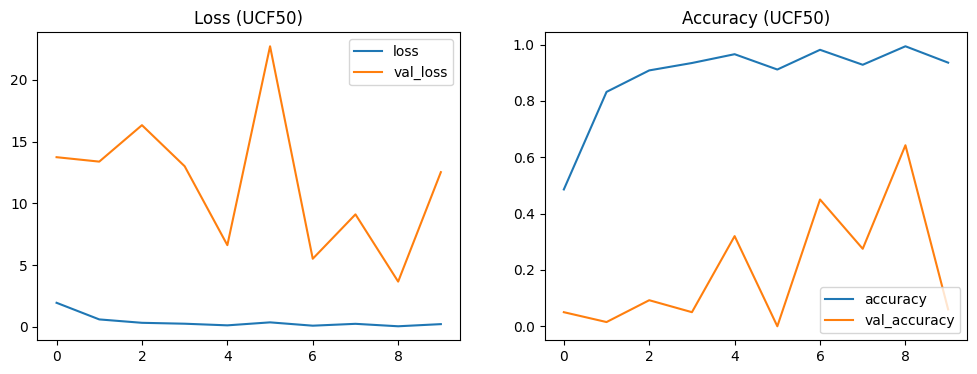

In [10]:
# Plot Model’s Loss & Accuracy Curves for UCF50
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_ucf50.history['loss'], label='loss')
plt.plot(history_cnn_ucf50.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss (UCF50)')
plt.subplot(1, 2, 2)
plt.plot(history_cnn_ucf50.history['accuracy'], label='accuracy')
plt.plot(history_cnn_ucf50.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy (UCF50)')
plt.show()

In [11]:
# Construct the CNN+LSTM Model
cnn_base_ucf50 = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(112, 112, 3))
cnn_out_ucf50 = tf.keras.layers.GlobalAveragePooling2D()(cnn_base_ucf50.output)
cnn_model_ucf50 = tf.keras.Model(inputs=cnn_base_ucf50.input, outputs=cnn_out_ucf50)
cnn_model_ucf50.trainable = False


input_shape_ucf50 = (20, 112, 112, 3)
cnn_lstm_input_ucf50 = tf.keras.layers.Input(shape=input_shape_ucf50)
reshaped_input_ucf50 = tf.keras.layers.TimeDistributed(cnn_model_ucf50)(cnn_lstm_input_ucf50)
lstm_out_ucf50 = tf.keras.layers.LSTM(64)(reshaped_input_ucf50)
cnn_lstm_output_ucf50 = tf.keras.layers.Dense(len(action_categories_ucf50), activation='softmax')(lstm_out_ucf50)
cnn_lstm_model_ucf50 = tf.keras.Model(inputs=cnn_lstm_input_ucf50, outputs=cnn_lstm_output_ucf50)


# Compile & Train the CNN+LSTM Model for UCF50
cnn_lstm_model_ucf50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn_lstm_ucf50 = cnn_lstm_model_ucf50.fit(X_train_ucf50, y_train_ucf50, epochs=10, batch_size=2, validation_split=0.2)




Epoch 1/10
40/40 [==============================] - 37s 608ms/step - loss: 3.9033 - accuracy: 0.0625 - val_loss: 3.3981 - val_accuracy: 0.2000
Epoch 2/10
40/40 [==============================] - 22s 548ms/step - loss: 2.7884 - accuracy: 0.3875 - val_loss: 2.9279 - val_accuracy: 0.3500
Epoch 3/10
40/40 [==============================] - 21s 538ms/step - loss: 2.0696 - accuracy: 0.6500 - val_loss: 2.5867 - val_accuracy: 0.3500
Epoch 4/10
40/40 [==============================] - 21s 536ms/step - loss: 1.4850 - accuracy: 0.9000 - val_loss: 2.1913 - val_accuracy: 0.6000
Epoch 5/10
40/40 [==============================] - 23s 574ms/step - loss: 1.1981 - accuracy: 0.9750 - val_loss: 2.0855 - val_accuracy: 0.7000
Epoch 6/10
40/40 [==============================] - 20s 492ms/step - loss: 0.8861 - accuracy: 1.0000 - val_loss: 1.9874 - val_accuracy: 0.7500
Epoch 7/10
40/40 [==============================] - 27s 676ms/step - loss: 0.7350 - accuracy: 1.0000 - val_loss: 1.9152 - val_accuracy: 0.7000

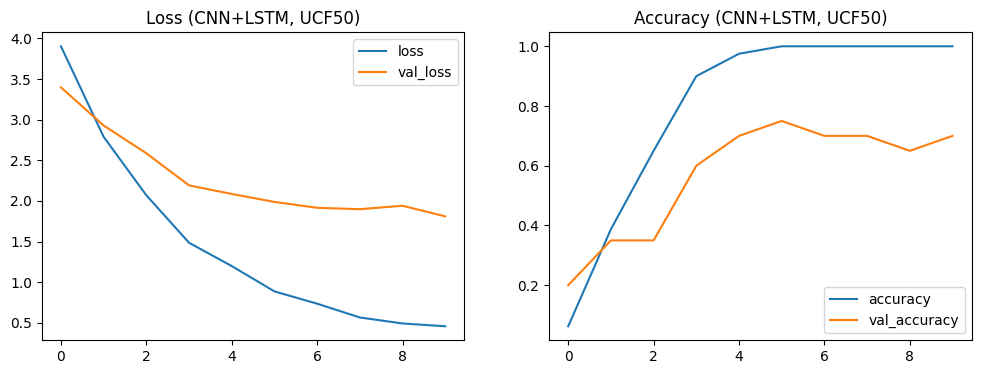

In [12]:
# Plot Model’s Loss & Accuracy Curves for UCF50
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm_ucf50.history['loss'], label='loss')
plt.plot(history_cnn_lstm_ucf50.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss (CNN+LSTM, UCF50)')
plt.subplot(1, 2, 2)
plt.plot(history_cnn_lstm_ucf50.history['accuracy'], label='accuracy')
plt.plot(history_cnn_lstm_ucf50.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy (CNN+LSTM, UCF50)')
plt.show()

In [18]:
# Step 6: Test the Best Performing Model on Local Videos
def predict_action(video_frames, model):
    video_frames = np.expand_dims(video_frames, axis=0)
    prediction = model.predict(video_frames)
    predicted_action = np.argmax(prediction)
    return predicted_action


# Retrieve the corresponding video path from the dataset
category_index = np.argmax(y_test_ucf101[random_video_index])
category_name = action_categories_ucf101[category_index]
video_files = os.listdir(os.path.join(dataset_path_ucf101, category_name))
video_filename = video_files[random_video_index % len(video_files)]
video_path = os.path.join(dataset_path_ucf101, category_name, video_filename)


print(f'The video used for prediction belongs to category: {category_name}')
print(f'Video filename: {video_filename}')
print(f'Full video path: {video_path}')



# Test the Model
random_index = random.randint(0, len(X_test_ucf50) - 1)
random_video = X_test_ucf50[random_index]
predicted_action_index = predict_action(random_video, cnn_lstm_model_ucf50)
predicted_action = action_categories_ucf50[predicted_action_index]
print(f'Predicted Action: {predicted_action}')









The video used for prediction belongs to category: trampoline_jumping
Video filename: v_jumping_25_01.avi
Full video path: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/trampoline_jumping/v_jumping_25_01.avi
1/1 [==============================] - 0s 181ms/step
Predicted Action: TrampolineJumping


Epoch 1/10
18/18 [==============================] - 21s 700ms/step - loss: 2.5340 - accuracy: 0.2286 - val_loss: 2.1301 - val_accuracy: 0.2222
Epoch 2/10
18/18 [==============================] - 11s 645ms/step - loss: 1.2445 - accuracy: 0.8286 - val_loss: 1.2885 - val_accuracy: 0.7778
Epoch 3/10
18/18 [==============================] - 9s 527ms/step - loss: 0.6368 - accuracy: 0.9143 - val_loss: 1.0993 - val_accuracy: 0.7778
Epoch 4/10
18/18 [==============================] - 10s 545ms/step - loss: 0.4574 - accuracy: 1.0000 - val_loss: 0.9174 - val_accuracy: 0.7778
Epoch 5/10
18/18 [==============================] - 11s 626ms/step - loss: 0.3344 - accuracy: 1.0000 - val_loss: 0.7901 - val_accuracy: 0.7778
Epoch 6/10
18/18 [==============================] - 9s 503ms/step - loss: 0.2439 - accuracy: 1.0000 - val_loss: 0.8070 - val_accuracy: 0.7778
Epoch 7/10
18/18 [==============================] - 10s 571ms/step - loss: 0.2052 - accuracy: 0.9714 - val_loss: 0.7607 - val_accuracy: 0.7778
E

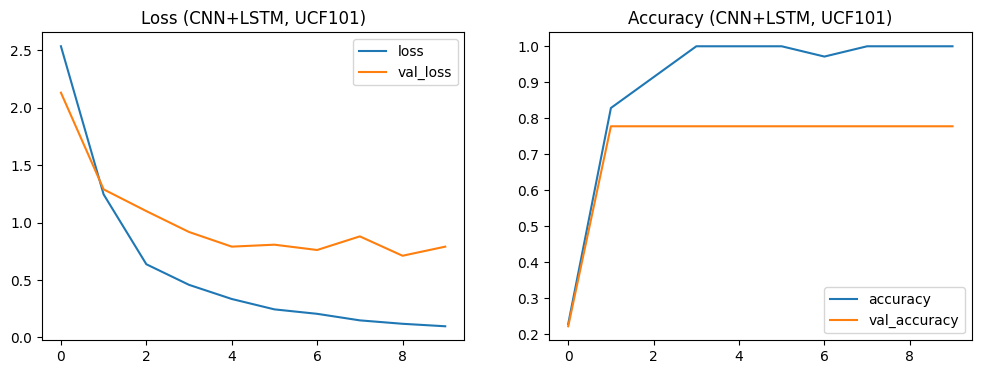

In [19]:


# Construct the CNN+LSTM Model for UCF101
cnn_base_ucf101 = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(112, 112, 3))
cnn_out_ucf101 = tf.keras.layers.GlobalAveragePooling2D()(cnn_base_ucf101.output)
cnn_model_ucf101 = tf.keras.Model(inputs=cnn_base_ucf101.input, outputs=cnn_out_ucf101)
cnn_model_ucf101.trainable = False


input_shape_ucf101 = (20, 112, 112, 3)
cnn_lstm_input_ucf101 = tf.keras.layers.Input(shape=input_shape_ucf101)
reshaped_input_ucf101 = tf.keras.layers.TimeDistributed(cnn_model_ucf101)(cnn_lstm_input_ucf101)
lstm_out_ucf101 = tf.keras.layers.LSTM(64)(reshaped_input_ucf101)
cnn_lstm_output_ucf101 = tf.keras.layers.Dense(len(action_categories_ucf101), activation='softmax')(lstm_out_ucf101)
cnn_lstm_model_ucf101 = tf.keras.Model(inputs=cnn_lstm_input_ucf101, outputs=cnn_lstm_output_ucf101)


# Compile & Train the CNN+LSTM Model for UCF101
cnn_lstm_model_ucf101.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn_lstm_ucf101 = cnn_lstm_model_ucf101.fit(X_train_ucf101, y_train_ucf101, epochs=10, batch_size=2, validation_split=0.2)


# Plot Model’s Loss & Accuracy Curves for UCF101
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm_ucf101.history['loss'], label='loss')
plt.plot(history_cnn_lstm_ucf101.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss (CNN+LSTM, UCF101)')
plt.subplot(1, 2, 2)
plt.plot(history_cnn_lstm_ucf101.history['accuracy'], label='accuracy')
plt.plot(history_cnn_lstm_ucf101.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy (CNN+LSTM, UCF101)')
plt.show()


# Identify the index of the random test video in X_test_ucf101 (assuming you're working with UCF101)
random_index = random.randint(0, len(X_test_ucf101) - 1) # Select a random index
random_test_video_ucf101 = X_test_ucf101[random_index] # Assign the random video to the variable
random_video_index = np.where(np.all(X_test_ucf101 == random_test_video_ucf101, axis=(1, 2, 3, 4)))[0][0]










In [24]:
# Identify the index of the random test video in X_test_ucf101 (assuming you're working with UCF101)
random_index = random.randint(0, len(X_test_ucf101) - 1) # Select a random index
random_test_video_ucf101 = X_test_ucf101[random_index] # Assign the random video to the variable
random_video_index = np.where(np.all(X_test_ucf101 == random_test_video_ucf101, axis=(1, 2, 3, 4)))[0][0]


# Retrieve the corresponding video path from the dataset
category_index = np.argmax(y_test_ucf101[random_video_index])
category_name = action_categories_ucf101[category_index]
video_files = os.listdir(os.path.join(dataset_path_ucf101, category_name))
video_filename = video_files[random_video_index % len(video_files)]
video_path = os.path.join(dataset_path_ucf101, category_name, video_filename)


print(f'The video used for prediction belongs to category: {category_name}')
print(f'Video filename: {video_filename}')
print(f'Full video path: {video_path}')


# Test the Model on UCF101
random_index = random.randint(0, len(X_test_ucf101) - 1)
random_video = X_test_ucf101[random_index]
predicted_action_index = predict_action(random_video, cnn_lstm_model_ucf101)
predicted_action = action_categories_ucf101[predicted_action_index]
print(f'Predicted Action: {predicted_action}')




The video used for prediction belongs to category: tennis_swing
Video filename: v_tennis_25_03.avi
Full video path: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/tennis_swing/v_tennis_25_03.avi
1/1 [==============================] - 0s 167ms/step
Predicted Action: tennis_swing


In [28]:
!pip install mediapipe  # Install the mediapipe module
import mediapipe as mp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [107]:
import os
import random
import numpy as np
import cv2
from IPython.display import display, HTML
from base64 import b64encode

# Function to visualize action name in the video with specified font style and color
def visualize_video(video_path, action_name, output_path='output_video.mp4', font_scale=0.75):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video '{video_path}'")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    # Process each frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Overlay the action name on the frame with adjusted font style and color
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f'Predicted Action: {action_name}'
        text_size, _ = cv2.getTextSize(text, font, font_scale, 2)
        text_x = 10
        text_y = 30 + text_size[1]  # Adjust vertical position based on text size

        cv2.putText(frame, text, (text_x, text_y), font, font_scale, (0, 0, 255), 1, cv2.LINE_AA)  # Changed color to black and thickness to 1 for normal font

        out.write(frame)  # Write the frame to the video file

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Display the video in Google Colab
    video_file = open(output_path, "rb").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    display(HTML(f"""<h2 style="text-align:center;">Predicted Action: {action_name}</h2>
                    <video width="600" height="400" controls>
                    <source src="{video_url}" type="video/mp4">
                    Your browser does not support the video tag.
                    </video>"""))

# Assuming these variables are defined in your environment
random_index = random.randint(0, len(X_test_ucf101) - 1)
predicted_action_index = predict_action(X_test_ucf101[random_index], cnn_lstm_model_ucf101)
predicted_action = action_categories_ucf101[predicted_action_index]

# Retrieve the corresponding video path from the dataset
category_index = np.argmax(y_test_ucf101[random_index])
category_name = action_categories_ucf101[category_index]
video_files = os.listdir(os.path.join(dataset_path_ucf101, category_name))
video_filename = video_files[random_index % len(video_files)]
video_path = os.path.join(dataset_path_ucf101, category_name, video_filename)

print(f'The video used for prediction belongs to category: {category_name}')
print(f'Video filename: {video_filename}')
print(f'Full video path: {video_path}')

# Visualize the video with predicted action name overlay (font_scale=0.5 for example)
output_video_path = '/content/output_video.mp4'  # Specify the path to save the output video
visualize_video(video_path, predicted_action, output_video_path, font_scale=0.5)  # Adjust font_scale as needed


1/1 [==============================] - 0s 277ms/step
The video used for prediction belongs to category: volleyball_spiking
Video filename: v_spiking_13_02.avi
Full video path: /content/drive/MyDrive/Colab Notebooks/action_youtube_naudio/volleyball_spiking/v_spiking_13_02.avi
